In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Document to Vector
import re
from time import time
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize

from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.model_selection import train_test_split

#Model 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import gensim.models as models
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

C:\Users\Naveen\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [4]:
train_df=pd.read_csv(r'train.csv',index_col=0)
test_df=pd.read_csv(r'test.csv',index_col=0)

In [5]:
train_df['flag']='train'
test_df['flag']='test'
all_data_df=pd.concat([train_df,test_df])

In [6]:
all_data_df['text']=all_data_df['text'].fillna("")

In [7]:
data_df=all_data_df[['issue','issue_area','flag','text']]

In [8]:
#checking missing values
data_df.isnull().sum()

issue         23
issue_area     0
flag           0
text           0
dtype: int64

In [9]:
data_df['issue']=data_df['issue'].replace(np.nan,'-1')

C:\Users\Naveen\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
#checking missing values
data_df.isnull().sum()

issue         0
issue_area    0
flag          0
text          0
dtype: int64

In [11]:
#changing data type
data_df['issue'] = data_df['issue'].astype(int)
data_df['text'] = data_df['text'].astype(str)

C:\Users\Naveen\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Naveen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
def cleanText(words):
    """The function to clean text"""
    words = re.sub("[^a-zA-Z]"," ",words)
    text = words.lower().split()
    return " ".join(text)

In [13]:
data_df['text']=data_df['text'].apply(cleanText)

C:\Users\Naveen\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Naveen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
stop = stopwords.words('english')
lem = WordNetLemmatizer()


def remove_stopwords(text):
    """The function to removing stopwords"""
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(text)

def word_lem(text):
    """The function to apply lemmatizing"""
    lem_text = [lem.lemmatize(word) for word in text.split()]
    return " ".join(lem_text)

In [16]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Naveen\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
data_df['text']=data_df['text'].apply(remove_stopwords)
data_df['text']=data_df['text'].apply(word_lem)

C:\Users\Naveen\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Naveen\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
data_df['text'] = data_df['text'].astype(str)

C:\Users\Naveen\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
#save clean data
data_df.to_csv(r'clean_data', encoding='utf-8')

In [20]:
issue_codes=pd.read_csv(r'issue_codes.csv',index_col=0)

In [21]:
issue_codes.head()

,code,value
0,100010,federal-state ownership dispute (cf. Submerged...
1,100020,federal pre-emption of state court jurisdiction
2,100030,federal pre-emption of state legislation or re...
3,100040,Submerged Lands Act (cf. federal-state ownersh...
4,100050,national supremacy: commodities


In [22]:
issue_label=np.arange(len(issue_codes['code']))

In [23]:
issue_codes['issue_label']=issue_label

In [25]:
issue_codes=issue_codes[['code','issue_label']]

In [26]:
data_df=data_df.merge(issue_codes,how='left',left_on='issue',right_on='code')

In [27]:
data_df=data_df.drop(columns=['code'])
data_df.head()

,issue,issue_area,flag,text,issue_label
0,30130,3,train,sol gen erwin n griswold appellant john g flym...,146.0
1,90380,9,train,appeal supreme court state oklahoma messrs rob...,263.0
2,100030,10,train,army sergeant ridgway first wife april granted...,2.0
3,10120,1,train,respondent arrested arraigned committed jail d...,24.0
4,20250,2,train,petitioner veteran entitled benefit veteran pr...,117.0


In [28]:
data_df['issue_label']=data_df['issue_label'].replace(np.nan,'-1')
data_df['issue_label'] = data_df['issue_label'].astype(int)

In [29]:
train_data_df=data_df[data_df['flag']=='train']
test_data_df=data_df[data_df['flag']=='test']

In [30]:
train_data_df.head()

,issue,issue_area,flag,text,issue_label
0,30130,3,train,sol gen erwin n griswold appellant john g flym...,146
1,90380,9,train,appeal supreme court state oklahoma messrs rob...,263
2,100030,10,train,army sergeant ridgway first wife april granted...,2
3,10120,1,train,respondent arrested arraigned committed jail d...,24
4,20250,2,train,petitioner veteran entitled benefit veteran pr...,117


In [31]:
train_text_list = train_data_df['text'].to_list()
test_text_list = test_data_df['text'].to_list()

In [32]:
corpus_list = []
for text in train_text_list:
    temp = text.split()
    corpus_list.append(temp)
for text in test_text_list:
    temp = text.split()
    corpus_list.append(temp)

In [34]:
from gensim import corpora
dictionary = corpora.Dictionary(corpus_list) 

In [36]:
corpus = [dictionary.doc2bow(text) for text in corpus_list] 

In [42]:
lda = models.LdaMulticore(corpus, num_topics=30, id2word=dictionary)
corpus_lda = lda[corpus]

In [43]:
for idx, topic in lda.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.019*"court" + 0.016*"state" + 0.009*"v" + 0.006*"see" + 0.005*"case" + 0.005*"right" + 0.005*"federal" + 0.005*"footnote" + 0.004*"would" + 0.004*"petitioner"
Topic: 1 
Words: 0.018*"court" + 0.011*"state" + 0.009*"v" + 0.007*"case" + 0.007*"u" + 0.005*"would" + 0.005*"claim" + 0.005*"law" + 0.005*"united" + 0.005*"federal"
Topic: 2 
Words: 0.013*"court" + 0.013*"state" + 0.009*"v" + 0.008*"case" + 0.006*"u" + 0.006*"act" + 0.006*"would" + 0.006*"see" + 0.005*"c" + 0.005*"united"
Topic: 3 
Words: 0.014*"court" + 0.013*"state" + 0.012*"v" + 0.007*"case" + 0.007*"u" + 0.006*"act" + 0.006*"would" + 0.005*"law" + 0.005*"c" + 0.005*"footnote"
Topic: 4 
Words: 0.017*"court" + 0.017*"state" + 0.010*"v" + 0.008*"case" + 0.007*"would" + 0.006*"law" + 0.005*"u" + 0.005*"footnote" + 0.004*"see" + 0.004*"act"
Topic: 5 
Words: 0.018*"court" + 0.010*"v" + 0.008*"state" + 0.006*"case" + 0.006*"u" + 0.005*"united" + 0.005*"see" + 0.005*"district" + 0.005*"c" + 0.004*"would"
Topic: 6

In [45]:
train = []
for i in range(len(corpus)):
    top_topics = (
        lda.get_document_topics(corpus[i],
                                      minimum_probability=0.0)
    )    
    topic = [top_topics[i][1] for i in range(30)]
    train.append(topic)

In [46]:
X = np.array(train_vecs)

In [48]:
issue_labels_list = train_data_df['issue_area'].to_list()
issue_labels_list += test_data_df['issue_area'].to_list()
y = np.array(issue_labels_list)

14

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

Training data
(5388, 30)
(5388,)
Test data
(1684, 30)
(1684,)


In [51]:
model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)
y_pred_lr=model_lr.predict(X_test)

C:\Users\Naveen\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [52]:
print('Testing accuracy %s' % accuracy_score(y_test, y_pred_lr))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred_lr, average='weighted')))

Testing accuracy 0.5106888361045131
Testing F1 score: 0.47024157270505873


In [65]:
report = classification_report(y_val, model_lr.predict(X_val), labels=np.arange(len(issue_area_code)))
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.60      0.85      0.70       321
           2       0.51      0.54      0.52       212
           3       0.52      0.34      0.41       114
           4       0.00      0.00      0.00        51
           5       0.00      0.00      0.00        14
           6       0.00      0.00      0.00        17
           7       0.64      0.60      0.62        47
           8       0.43      0.65      0.52       276
           9       0.48      0.29      0.36       174
          10       0.00      0.00      0.00        59
          11       0.00      0.00      0.00         9
          12       0.68      0.29      0.41        45
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         0

   micro avg       0.52      0.52      0.52      1342
   macro avg       0.26      0.24      0.24      1342
weighted avg       0.46   

C:\Users\Naveen\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Naveen\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Result
[[  0   1   1   0   0   0   0   0   2   1   0   0   0   0]
 [  0 321   7   6   0   0   0   2  32  19   0   0   2   0]
 [  0  68 143   7   0   0   1   2  38  19   0   0   1   0]
 [  0  25  23  67   0   0   1   0   8   2   0   0   0   0]
 [  0  24   9   3   0   0   0   0  28   6   0   0   0   0]
 [  0   3   5   6   0   0   0   0   9   2   0   0   0   0]
 [  0   1  12   1   0   0   2   0   3   1   0   0   1   0]
 [  0   6   1   1   0   0   0  33  24   5   0   0   1   0]
 [  0  55  19   5   0   0   1   5 199  29   0   0   1   0]
 [  0  44  36   5   0   0   0   6  64  72   0   0   1   0]
 [  0   1   6   2   0   0   0   7  42  12   0   0   1   0]
 [  0   5   0   1   0   0   0   0   4   6   0   0   0   0]
 [  0   7   1   0   0   0   0   1  32   1   0   0  23   0]
 [  0   0   0   0   0   0   0   0   4   0   0   0   0   0]]


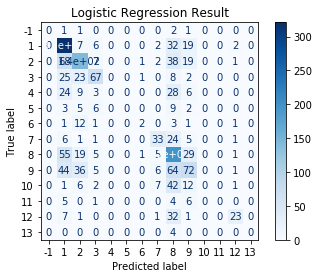

In [67]:
confusion_matrix(y_test, y_pred_lr)

disp = plot_confusion_matrix(model_lr, X_test, y_test,
                                 cmap=plt.cm.Blues)
disp.ax_.set_title("Logistic Regression Result")

print("Logistic Regression Result")
print(disp.confusion_matrix)